# Import necessary libraries

In [3]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.3
)

In [5]:
root_dir = "C:/Users/abhij/Downloads/DL Assigments/caltech-101-img"

img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset="training"
)

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


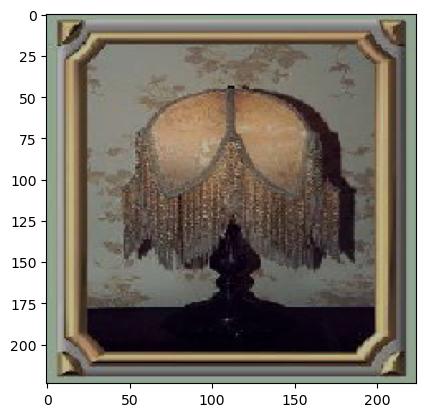

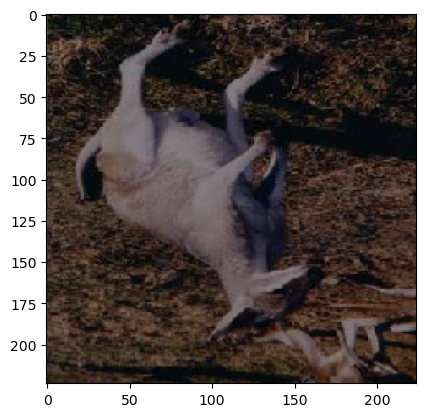

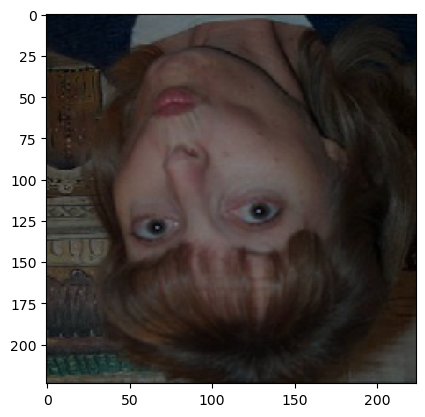

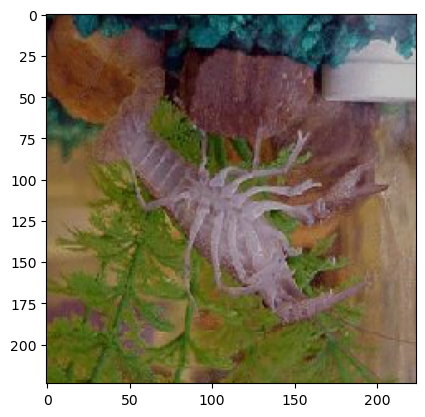

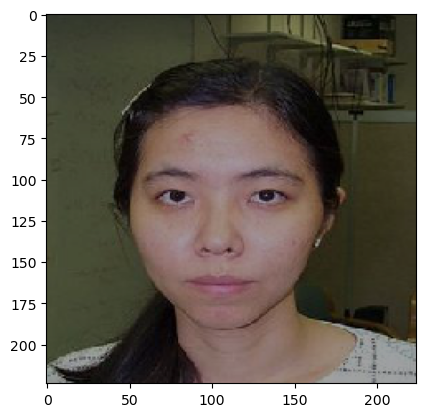

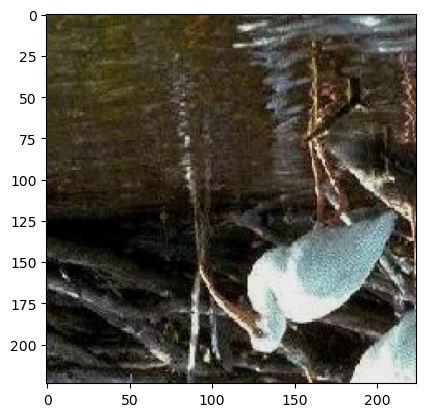

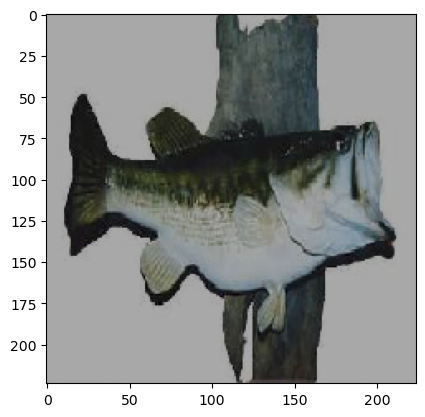

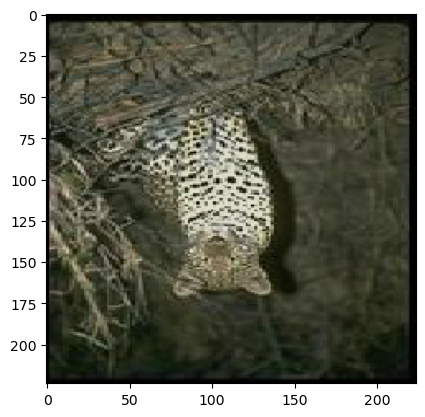

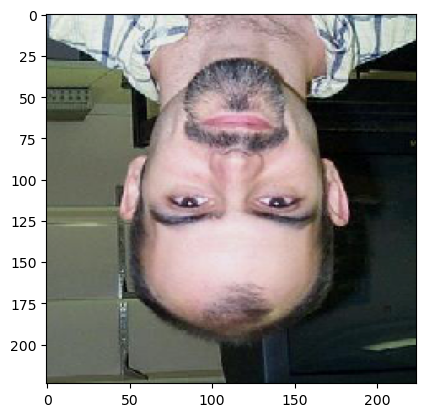

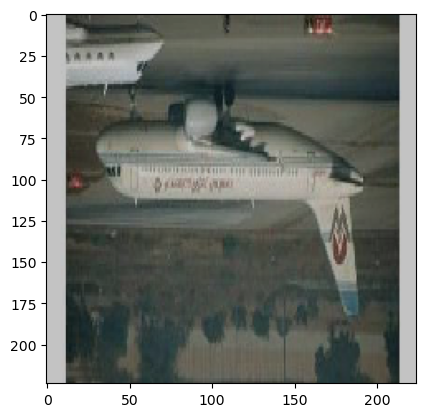

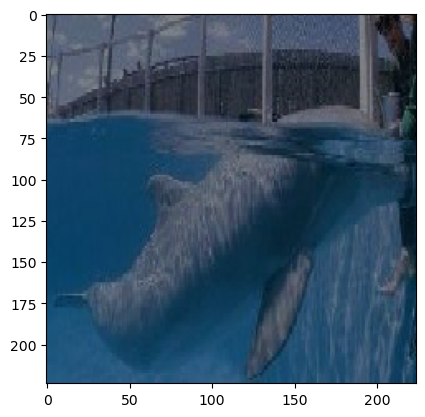

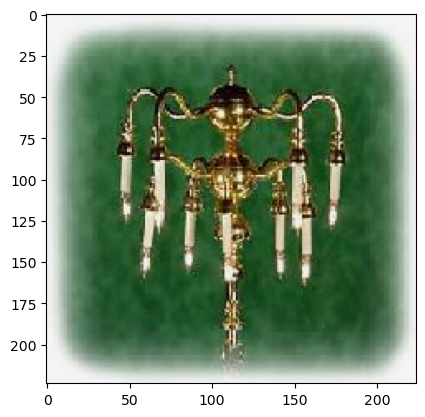

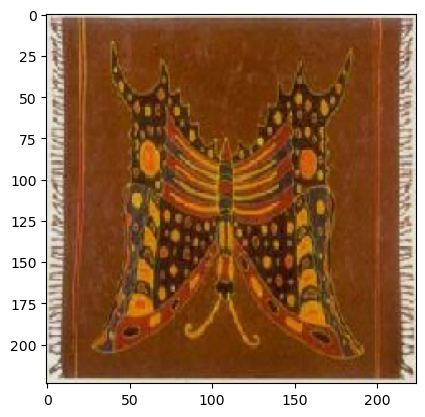

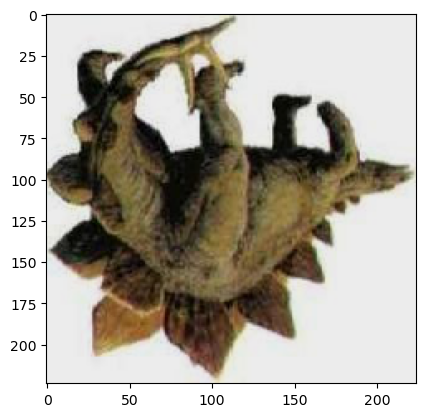

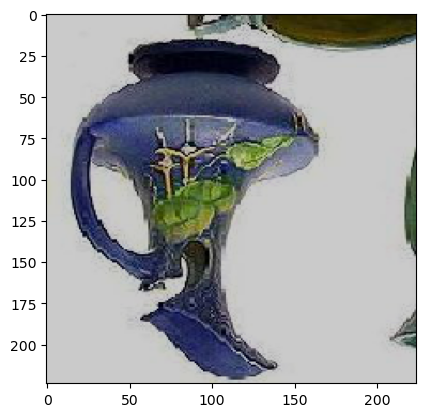

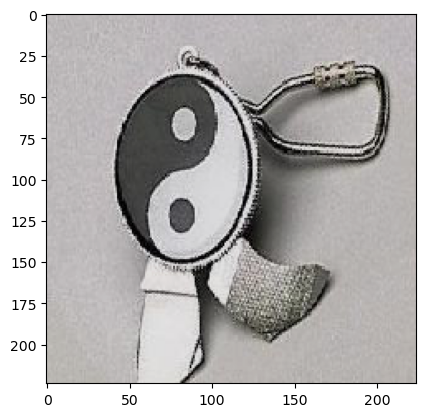

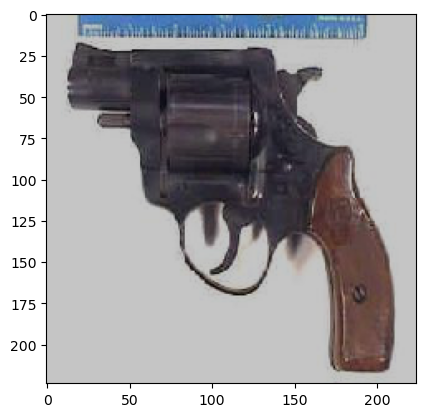

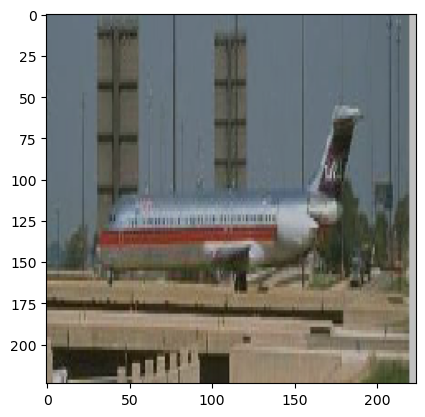

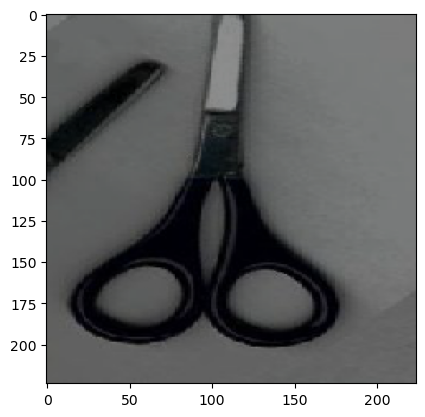

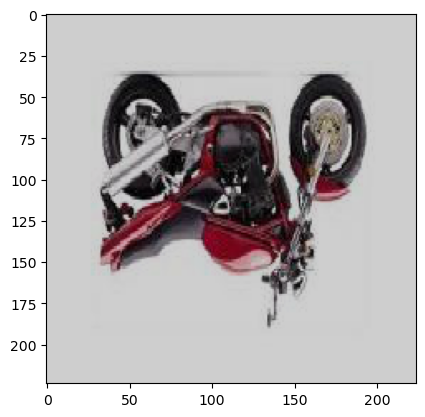

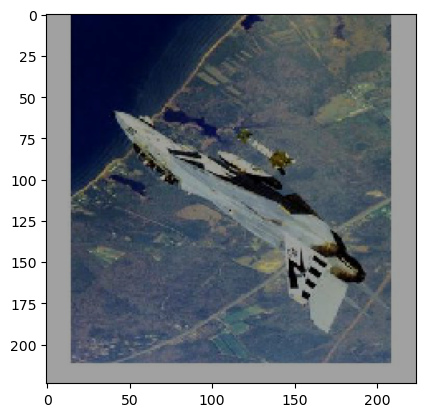

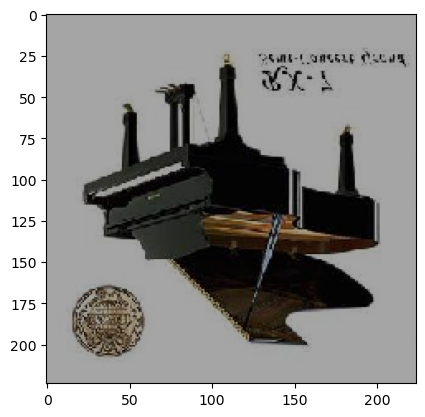

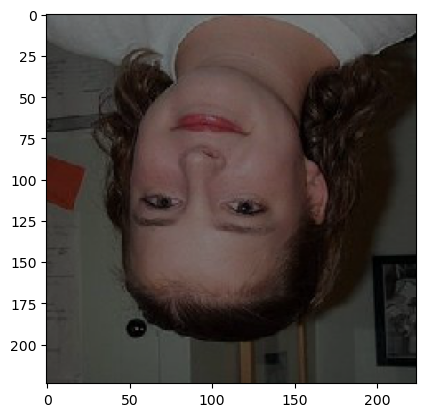

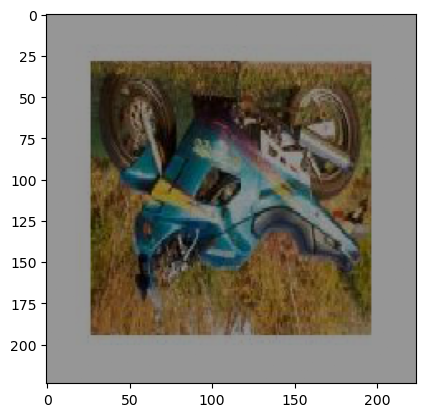

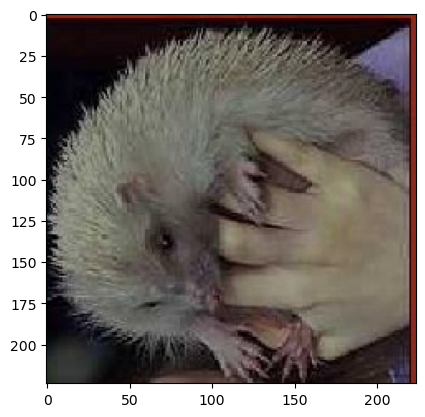

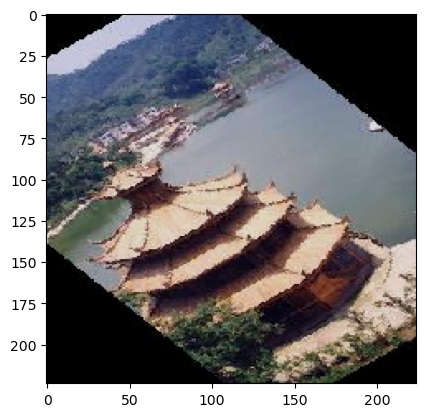

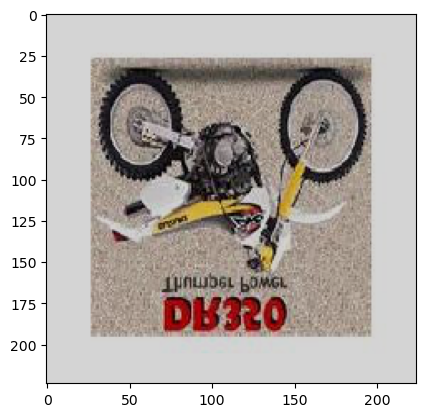

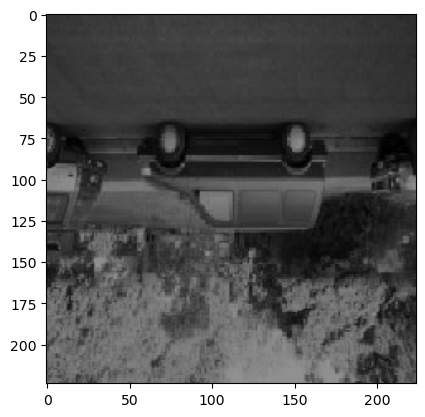

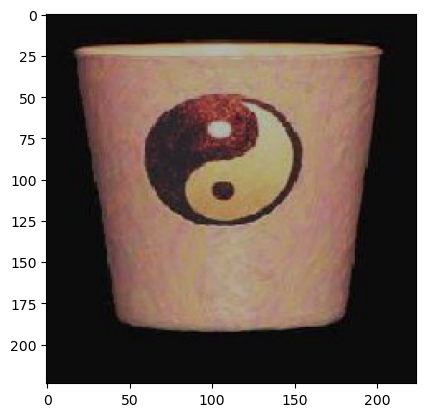

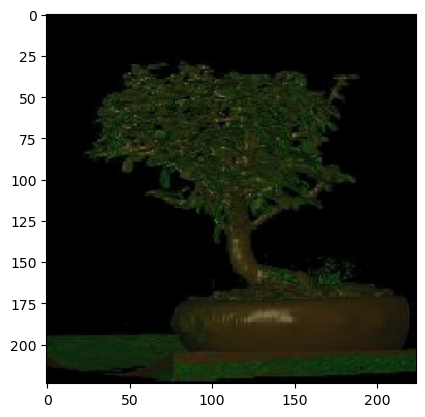

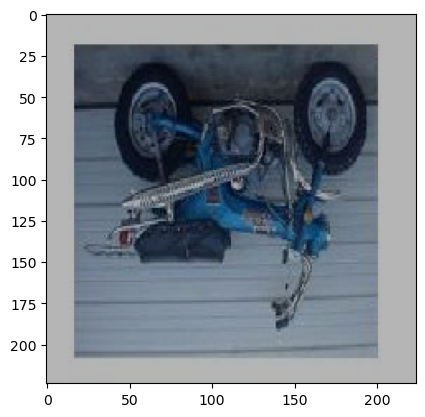

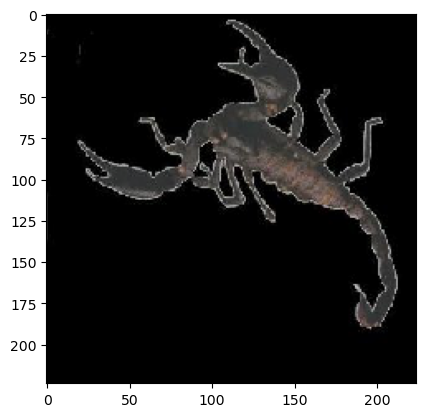

In [6]:
imgs, labels = next (iter(img_generator_flow_train))
for img, labels in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

# a. Loading pre-trained model

In [7]:
model_path = "C:/Users/abhij/Downloads/DL Assigments/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights= model_path
                  )

# b. Freeze parameters

In [8]:
base_model.trainable = False

# c. Add custom classifier with several layers of trainable parameteres to model

In [9]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 102)                 │         470,118 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,184,806 (57.93 MB)

 Trainable params: 470,118 (1.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# d. Train classifier layers on training data available for task

In [11]:
adam = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=2,
          epochs = 3)

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0312 - loss: 5.1874     

In [ ]:
plt.plot(model.history.history['accuracy'], label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()

# Fine-tune hyper parameters and unfreeze more layers

In [ ]:
base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5, 
          epochs=10)

In [ ]:
predicted_value = model.predict(img_generator_flow_valid)
labels = list(training_data.class_indices.keys())
n = 887

plt.imshow(training_data[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(validation_data[n])])